In [392]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [393]:
def display_high_number(numbers):
    n = 3
    output = []
    for number in numbers:
        output.append(','.join([str(number)[::-1][i:i+n] for i in range(0, len(str(number)), n)])[::-1])
    return output

In [394]:
def prepare_mode_data(samples):
    return [ float(f'{s:.2f}') for s in samples]

# Firefly pixel study

In [395]:
# 312, 271 => veach scene
input_samples = "output_samples_p3d.txt"
ref_input_samples = "output_samples_p3d_1M.txt"

In [396]:
data_rgb = None
with open(input_samples, 'r') as f:
    lines = f.readlines()
    data_rgb = [ list(map(float, l.split(','))) for l in lines ]
    
ref_data_rgb = None
with open(ref_input_samples, 'r') as f:
    lines = f.readlines()
    ref_data_rgb = [ list(map(float, l.split(','))) for l in lines ]

In [397]:
data_rgb = np.array(data_rgb)
ref_data_rgb = np.array(ref_data_rgb)

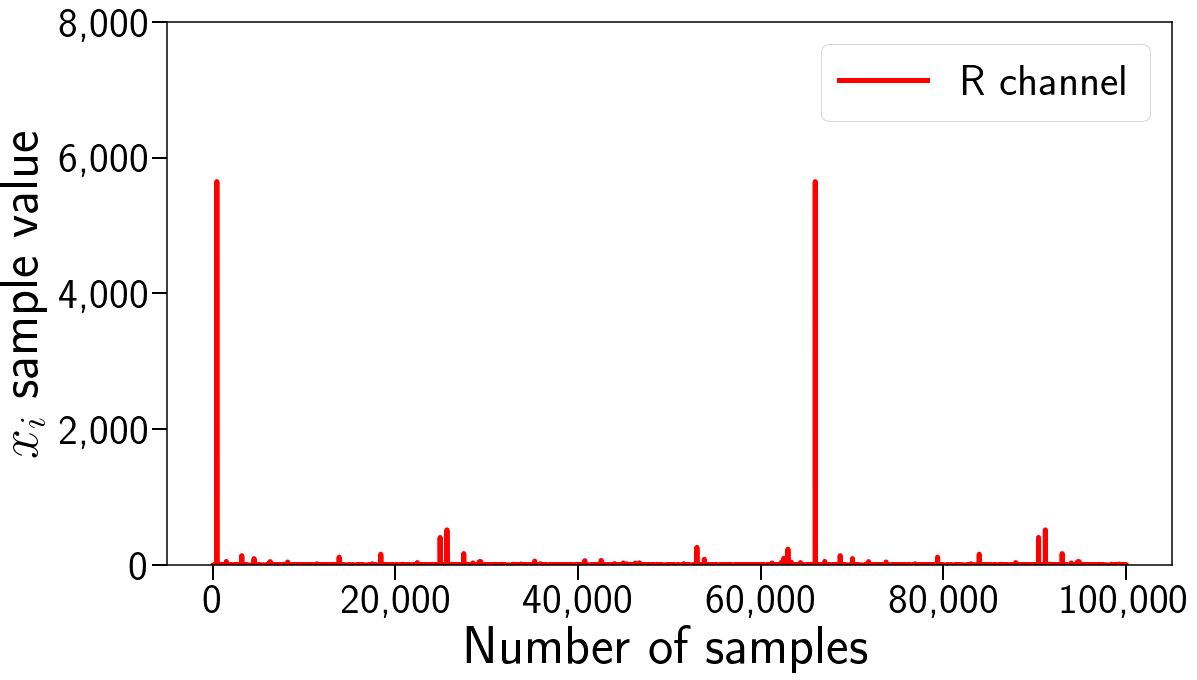

In [398]:
params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'figure.figsize': (18, 10)}

plt.rcParams.update(params)
plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

labels = ['R', 'G', 'B']
i = 0
plt.plot(data_rgb[:, i], lw=5, label=labels[i] + ' channel', color=labels[i].lower(), alpha=1)
    
plt.xlabel("Number of samples")
plt.ylabel("$x_i$ sample value")
plt.legend(loc='upper right')
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 120000, step=20000), display_high_number(np.arange(0, 120000, step=20000)))
plt.yticks(np.arange(0, 12000, step=2000), display_high_number(np.arange(0, 12000, step=2000)))
plt.ylim(0, 8000)
plt.savefig("images/rgb_noisy.png", transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

# Compute means

In [399]:
# remove of outlier
data_filtered_rgb = []
for i in range(3):
    max_value = np.max(data_rgb[:, i])
    min_value = np.min(data_rgb[:, i])
    data_filtered_rgb.append(np.array(list(map(lambda x: min_value if x > 500 else x , data_rgb[:, i]))))
    
data_filtered_rgb = np.array(data_filtered_rgb)

ref_data_filtered_rgb = []
for i in range(3):
    max_value = np.max(ref_data_rgb[:, i])
    min_value = np.min(ref_data_rgb[:, i])
    ref_data_filtered_rgb.append(np.array(list(map(lambda x: min_value if x > 500 else x , ref_data_rgb[:, i]))))
    
ref_data_filtered_rgb = np.array(ref_data_filtered_rgb)

In [400]:
def compute_means(samples):
    
    means = []
    samples_sum = 0
    
    for i in range(len(samples)):
        samples_sum += samples[i]
        means.append(samples_sum / (i + 1))
        
    return means

In [401]:
samples_means = []
for i in range(3):
    samples_means.append(compute_means(data_rgb[:, i]))

In [402]:
filter_samples_means = []
for i in range(3):
    filter_samples_means.append(compute_means(data_filtered_rgb[i]))

In [403]:
ref_filter_samples_means = []
for i in range(3):
    ref_filter_samples_means.append(compute_means(ref_data_filtered_rgb[i]))

In [404]:
r_true_mean = np.mean(ref_data_filtered_rgb[0])

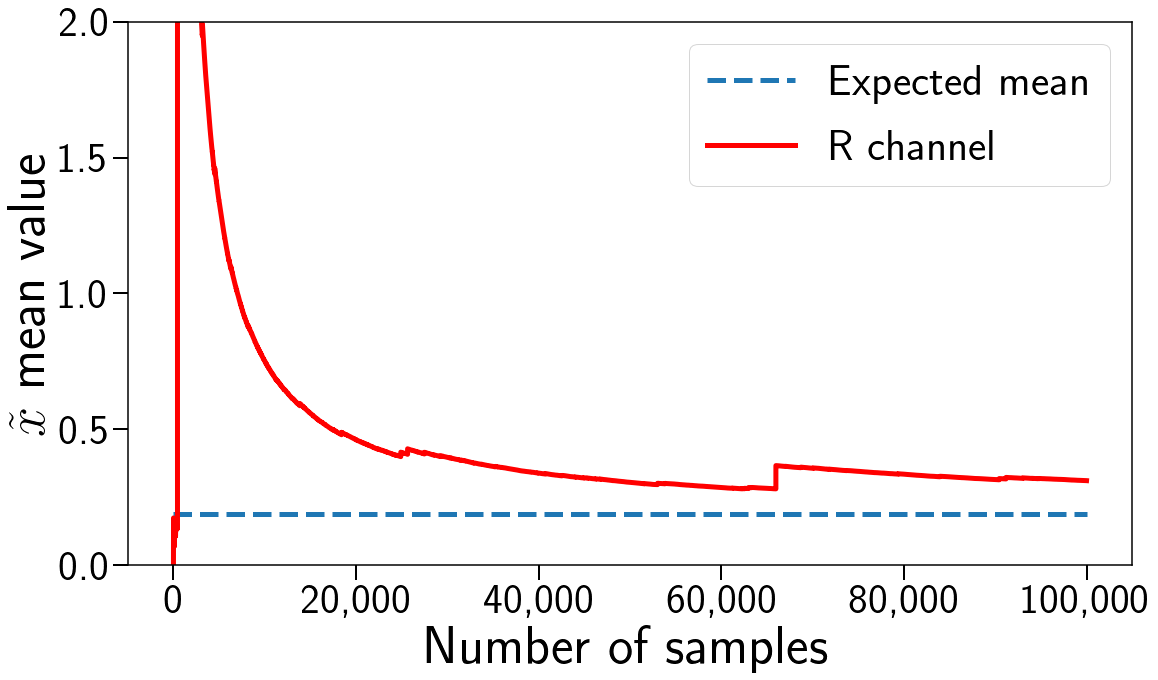

In [405]:
params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'figure.figsize': (18, 10)}

plt.rcParams.update(params)
plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

plt.margins(tight=True)
plt.rcParams.update(params)

labels = ['R', 'G', 'B']

i = 0
plt.plot([0, 100000], [r_true_mean, r_true_mean], lw=5, label='Expected mean', linestyle="--")
plt.plot(samples_means[i], lw=5, label=labels[i] + ' channel', color=labels[i].lower(), alpha=1)
#plt.plot(filter_samples_means[i], lw=2.5, label="Expected " + labels[i] + " mean (without $\gamma$ correction)", color="gray", alpha=0.8, linestyle="--")
    
plt.xlabel("Number of samples")
plt.ylabel(r"$\tilde{x}$ mean value")

plt.legend()
plt.ylim(0, 2)

#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 120000, step=20000), display_high_number(np.arange(0, 120000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0, 2.5, step=0.5), np.arange(0, 2.5, step=0.5))
plt.savefig("images/rgb_means_noisy.png", transparent=True, bbox_inches='tight', pad_inches=0.1)

plt.show()


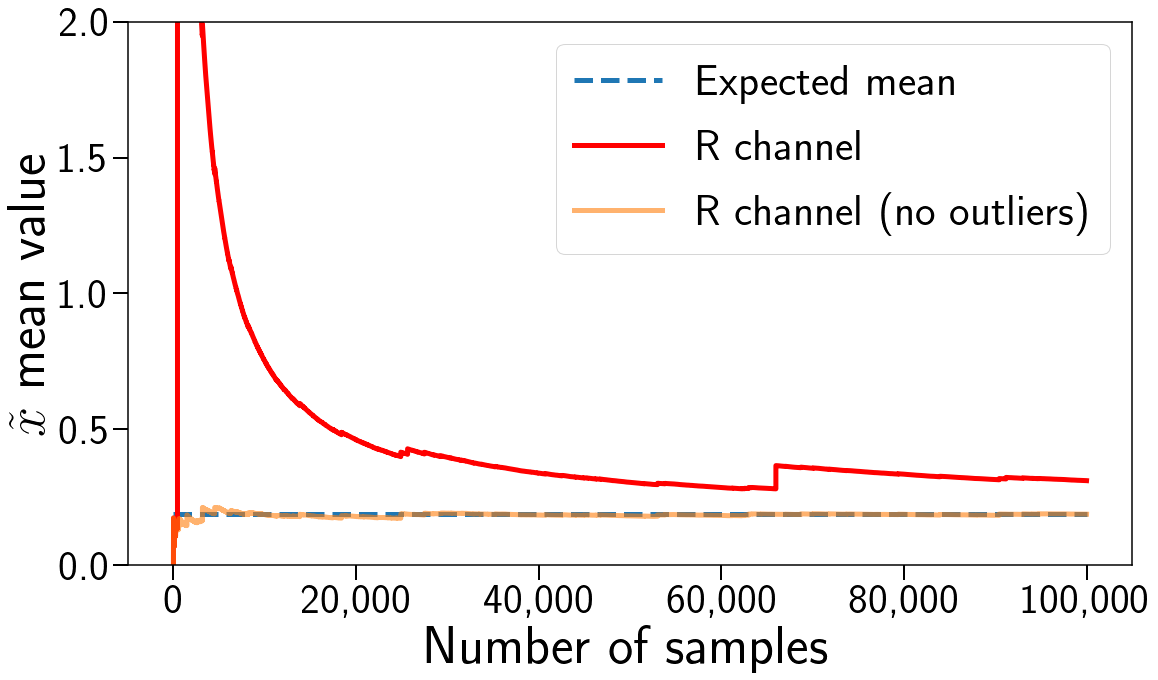

In [406]:
params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'figure.figsize': (18, 10)}

plt.rcParams.update(params)
plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

labels = ['R', 'G', 'B']

#for i in range(3):
i = 0
plt.plot([0, 100000], [r_true_mean, r_true_mean], lw=5, label='Expected mean', linestyle="--")
plt.plot(samples_means[i], lw=5, label=labels[i]  + " channel", color=labels[i].lower(), alpha=1)
plt.plot(filter_samples_means[i], lw=5, label=labels[i] + " channel (no outliers)", alpha=0.6)
    
plt.xlabel("Number of samples")
plt.ylabel(r"$\tilde{x}$ mean value")
plt.legend()
plt.ylim(0, 2)
plt.xticks(np.arange(0, 120000, step=20000), display_high_number(np.arange(0, 120000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0, 2.5, step=0.5), np.arange(0, 2.5, step=0.5))
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.savefig("images/rgb_means_noisy_expected.png", transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()


# Gini value from firefly sample

In [407]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

In [408]:
def create_k_means(samples, k=11):
    
    means = []
    counters = []
    
    for i in range(k):
        means.append(0)
        counters.append(0)
        
    index = 0
    final_means = []
    for s in samples:
        
        means[index] += s
        counters[index] += 1
        
        index += 1
        
        if index >= k:
            index = 0
            
        current_means = []
        for i in range(k):
            
            if counters[i] != 0:
                current_means.append(means[i] / counters[i])
            
        final_means.append(current_means)
    
    return final_means

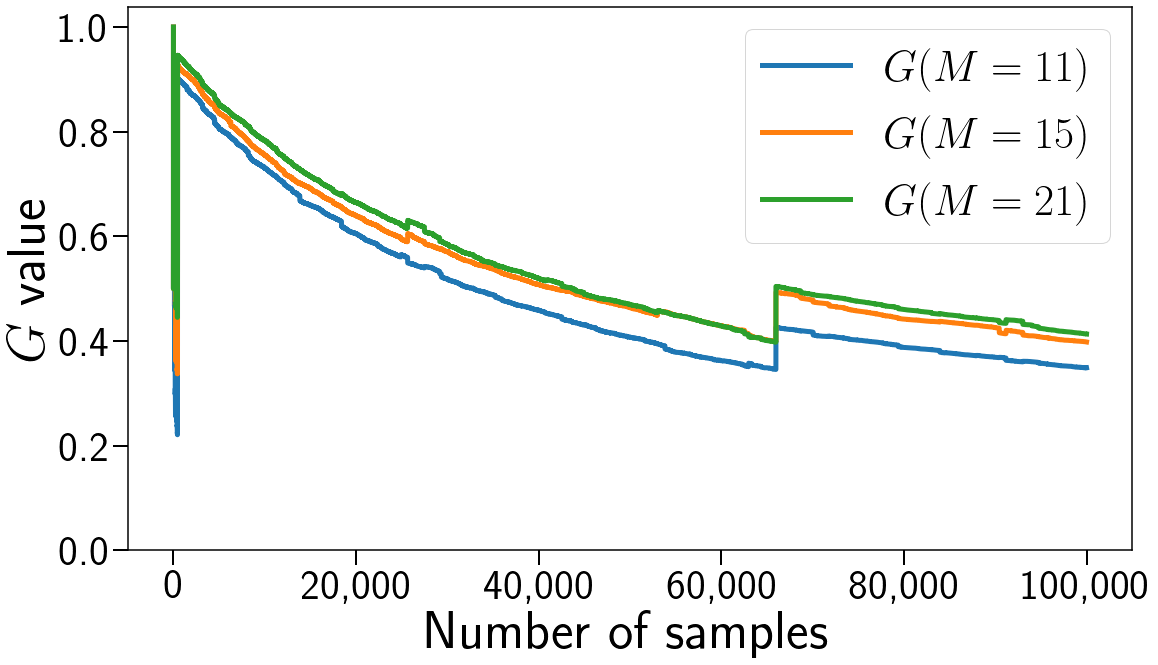

In [445]:
samples_axis_mean = np.mean(data_rgb, axis=1)
means_evolution_k11 = create_k_means(samples_axis_mean, k=11)
means_evolution_k15 = create_k_means(samples_axis_mean, k=15)
means_evolution_k21 = create_k_means(samples_axis_mean, k=21)

gini_data_k11 = [ gini(np.array(m)) for m in means_evolution_k11 ]
check_gini_values_k11 = np.array(list(map(lambda x: 1 if x == 0 else x, gini_data_k11)))

gini_data_k15 = [ gini(np.array(m)) for m in means_evolution_k15 ]
check_gini_values_k15 = np.array(list(map(lambda x: 1 if x == 0 else x, gini_data_k15)))

gini_data_k21 = [ gini(np.array(m)) for m in means_evolution_k21 ]
check_gini_values_k21 = np.array(list(map(lambda x: 1 if x == 0 else x, gini_data_k21)))


params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'figure.figsize': (18, 10)}

plt.rcParams.update(params)
plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

#for i in range(3):
plt.plot(check_gini_values_k11, lw=5, label="$G (M = 11)$")
plt.plot(check_gini_values_k15, lw=5, label="$G (M = 15)$")
plt.plot(check_gini_values_k21, lw=5, label="$G (M = 21)$")

plt.xlabel("Number of samples")
plt.ylabel(r"$G$ value")
plt.legend()
#plt.ylim(0, 2)
plt.xticks(np.arange(0, 120000, step=20000), display_high_number(np.arange(0, 120000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0, 1.2, step=0.2), prepare_mode_data(np.arange(0, 1.2, step=0.2)))
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.savefig("images/gini_evolution_with_outliers.png", transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

### 0 signifie l'égalité parfaite et 1, qui ne peut être atteint, signifierait une inégalité parfaite 

# Without outlier

In [446]:
samples_axis_mean_filtered = np.mean(data_filtered_rgb, axis=0)

In [447]:
means_evolution_filtered = create_k_means(samples_axis_mean_filtered)

In [448]:
gini_data_filtered = [ gini(np.array(m)) for m in means_evolution_filtered ]
check_gini_values_filtered = np.array(list(map(lambda x: 1 if x == 0 else x, gini_data_filtered)))

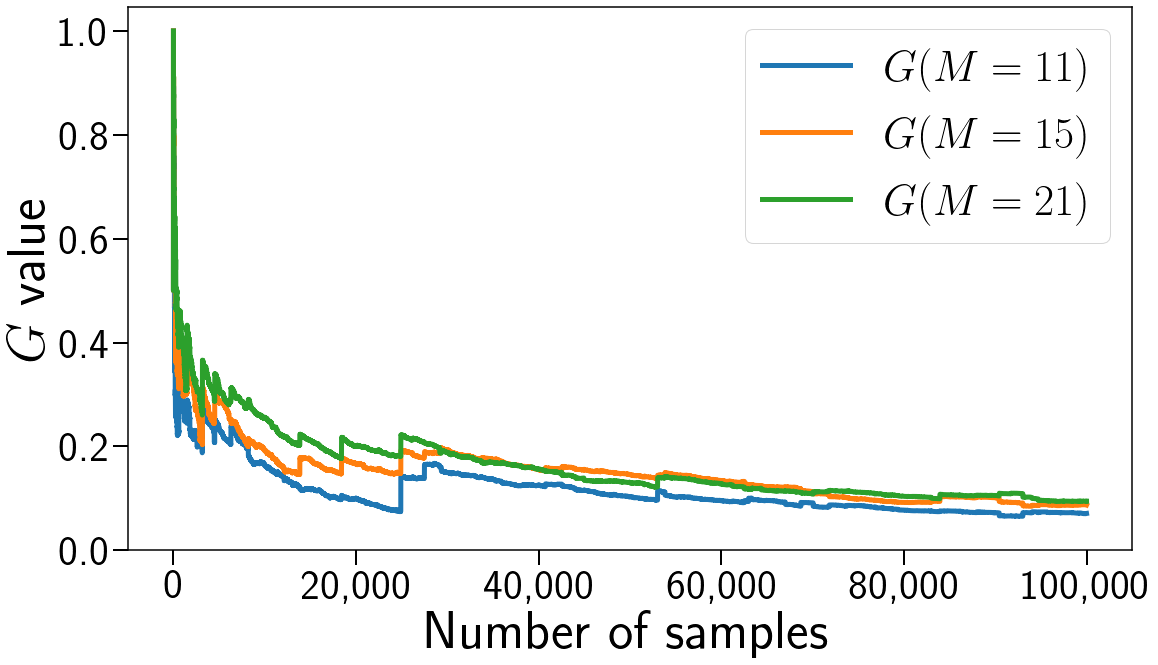

In [449]:
samples_axis_mean = np.mean(data_filtered_rgb, axis=0)
means_evolution_k11 = create_k_means(samples_axis_mean, k=11)
means_evolution_k15 = create_k_means(samples_axis_mean, k=15)
means_evolution_k21 = create_k_means(samples_axis_mean, k=21)

gini_data_k11 = [ gini(np.array(m)) for m in means_evolution_k11 ]
check_gini_values_k11 = np.array(list(map(lambda x: 1 if x == 0 else x, gini_data_k11)))

gini_data_k15 = [ gini(np.array(m)) for m in means_evolution_k15 ]
check_gini_values_k15 = np.array(list(map(lambda x: 1 if x == 0 else x, gini_data_k15)))

gini_data_k21 = [ gini(np.array(m)) for m in means_evolution_k21 ]
check_gini_values_k21 = np.array(list(map(lambda x: 1 if x == 0 else x, gini_data_k21)))

params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'figure.figsize': (18, 10)}

plt.rcParams.update(params)
plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

#for i in range(3):
plt.plot(check_gini_values_k11, lw=5, label="$G (M = 11)$")
plt.plot(check_gini_values_k15, lw=5, label="$G (M = 15)$")
plt.plot(check_gini_values_k21, lw=5, label="$G (M = 21)$")

plt.xlabel("Number of samples")
plt.ylabel(r"$G$ value")
plt.legend()
#plt.ylim(0, 2)
plt.xticks(np.arange(0, 120000, step=20000), display_high_number(np.arange(0, 120000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0, 1.2, step=0.2), prepare_mode_data(np.arange(0, 1.2, step=0.2)))
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.savefig("images/gini_evolution_with_no_outliers.png", transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [414]:
samples_axis_mean_filtered = np.mean(data_filtered_rgb, axis=0)

In [415]:
means_evolution_filtered = create_k_means(samples_axis_mean_filtered, k=21)

In [416]:
gini_data_filtered = [ gini(np.array(m)) for m in means_evolution_filtered ]
check_gini_values_filtered = np.array(list(map(lambda x: 1 if x == 0 else x, gini_data_filtered)))

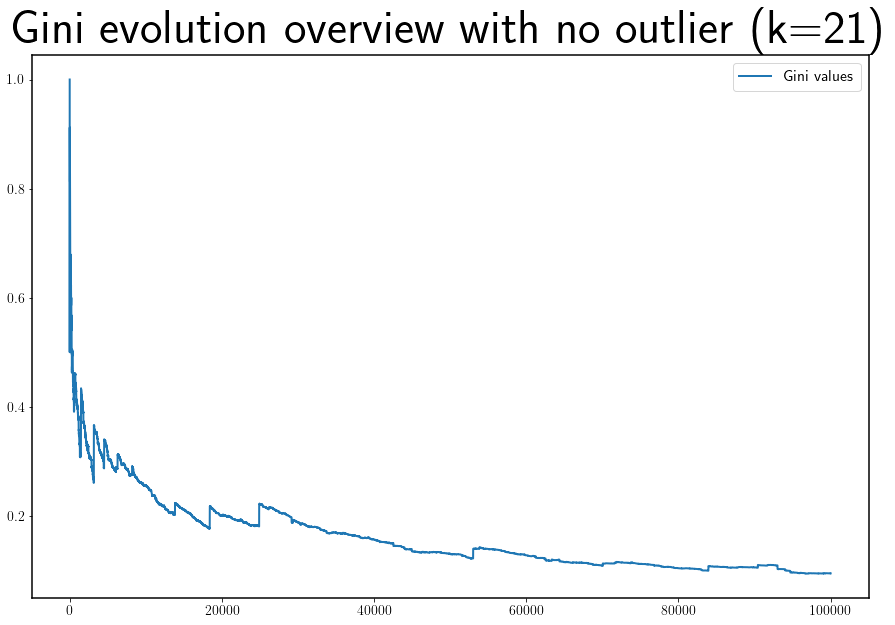

In [417]:
plt.figure(figsize=(15, 10))
plt.title("Gini evolution overview with no outlier (k=21)")
plt.plot(check_gini_values_filtered, lw=2, label="Gini values")    
plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Display Statistics values

In [418]:
data_reduced_rgb = []

for i in range(3):
    samples = []
    data_reduced_rgb.append(prepare_mode_data(data_filtered_rgb[i]))
    
data_reduced_rgb = np.array(data_reduced_rgb)

In [419]:
mode_value = stats.mode(data_reduced_rgb[0])[0][0]
median_value = np.median(data_reduced_rgb[0])
mean_value = np.mean(data_reduced_rgb[0])

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


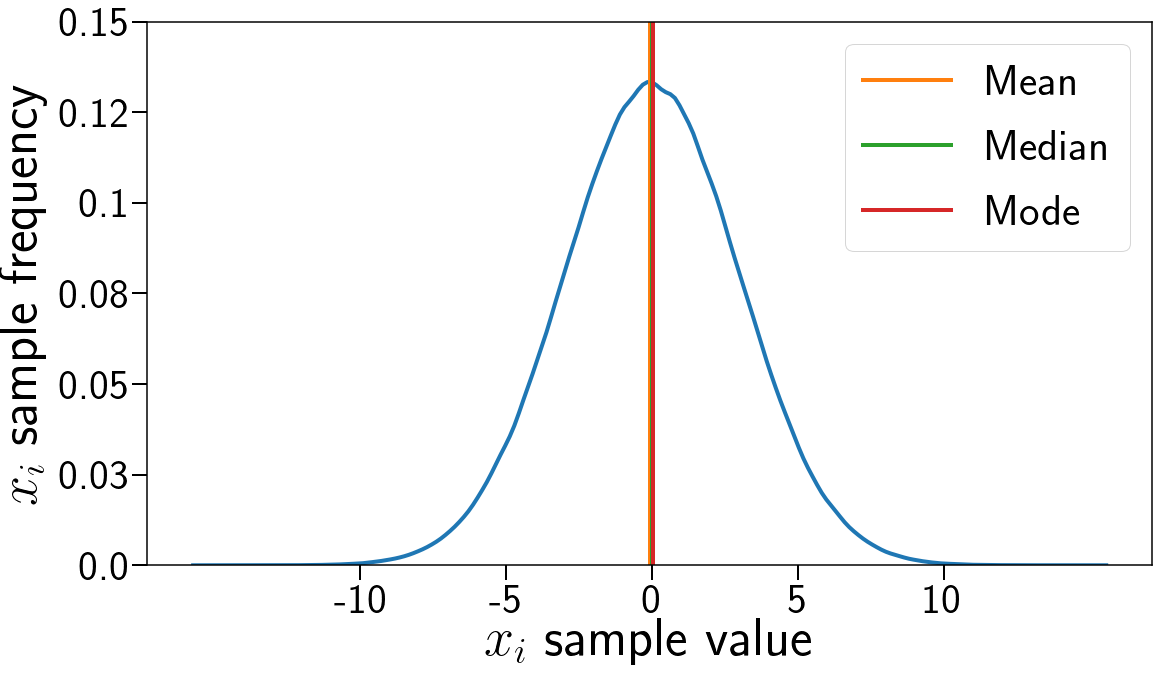

In [420]:
import seaborn as sns

samples = np.random.normal(loc=0, scale=3.0, size=10000)

data = samples

params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (18, 10)}

samples = np.random.normal(loc=0, scale=3.0, size=1000000)

plt.rcParams.update(params)

plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

labels = ['R', 'G', 'B']

#for i in range(3):
sns.distplot(samples, hist=False, norm_hist=True)

prepared_samples = prepare_mode_data(samples)
mode_value = stats.mode(prepared_samples)[0][0]
median_value = np.median(prepared_samples[0])
mean_value = np.mean(prepared_samples[0])

plt.plot([-0.05, -0.05], [0, 1], label='Mean', linewidth=4)
plt.plot([0, 0], [0, 1], label='Median', linewidth=4)
plt.plot([+0.05, +0.05], [0, 1], label='Mode', linewidth=4)
#plt.ylim(0, 0.10)
#plt.xlim(-1, 100)
        
plt.xlabel("$x_i$ sample value")
plt.ylabel(r"$x_i$ sample frequency")
plt.ylim(0, 0.15)
plt.legend()
plt.xticks(np.arange(-10, 15, step=5), np.arange(-10, 15, step=5))  # Set label locations.
plt.yticks(np.arange(0, 0.175, step=0.025), prepare_mode_data(np.arange(0, 0.175, step=0.025)))
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.savefig("images/normal_distribution.png", transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


0.14941525033531516


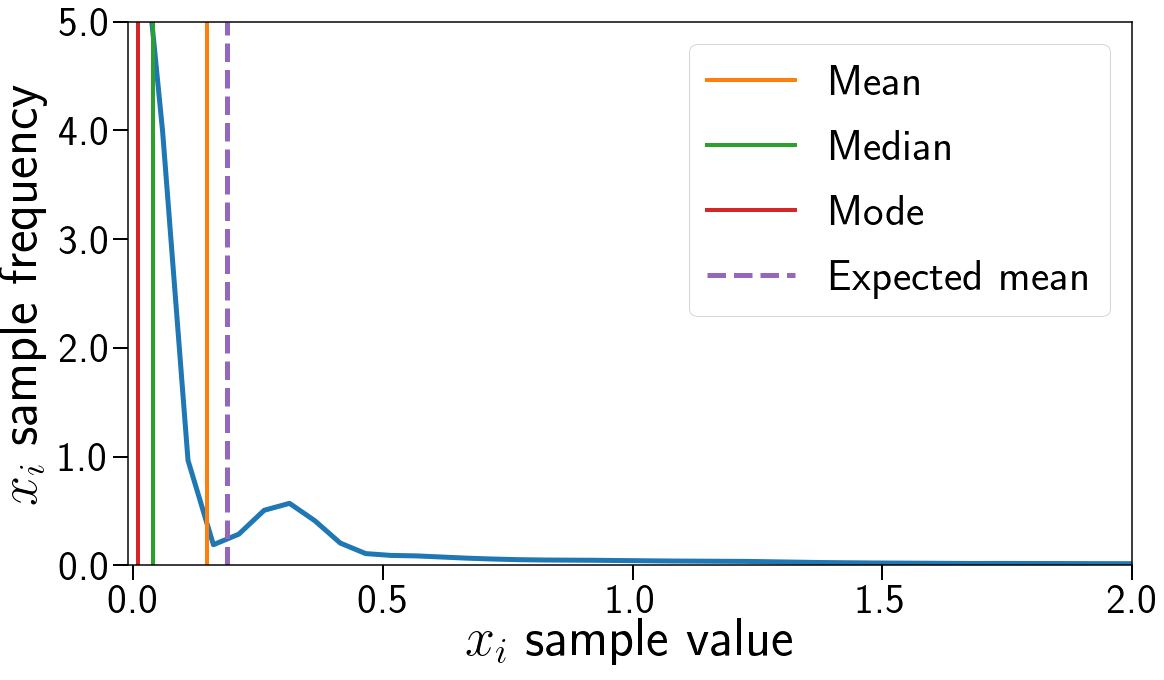

In [421]:
import seaborn as sns

params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 5,
          'figure.figsize': (18, 10)}


plt.rcParams.update(params)

plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

labels = ['R', 'G', 'B']

#for i in range(3):
# filtered distribution
samples = np.array(data_reduced_rgb[0])
samples += 0.01
samples = [s for s in samples if s < 10]

mode_value = stats.mode(samples)[0][0]
median_value = np.median(samples)
mean_value = np.mean(samples)


sns.distplot(np.array(samples), hist=False, norm_hist=True)
print(np.mean(samples))

plt.plot([mean_value, mean_value], [0, 5], label='Mean', linewidth=4)
plt.plot([median_value + 0.03, median_value + 0.03], [0, 5], label='Median', linewidth=4)
plt.plot([mode_value, mode_value], [0, 5], label='Mode', linewidth=4)
plt.plot([r_true_mean, r_true_mean], [0, 5], lw=5, label='Expected mean', linestyle="--")

#plt.xlim(-1, 100)
        
plt.xlabel("$x_i$ sample value")
plt.ylabel(r"$x_i$ sample frequency")
#plt.ylim(0, 0.15)
plt.xlim(-0.01, 2)
plt.ylim(0, 5)
plt.legend()
#plt.xticks(np.arange(-10, 15, step=5), np.arange(-10, 15, step=5))  # Set label locations.
plt.xticks(np.arange(0, 2.5, step=0.5), np.arange(0, 2.5, step=0.5))
plt.yticks(np.arange(0, 5.5, step=1), prepare_mode_data(np.arange(0, 5.5, step=1)))
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.savefig("images/r_channel_distribution.png", transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

### Compare mean, median and mode

In [422]:
samples_axis_mean_filtered = np.mean(data_filtered_rgb[0])

In [423]:
means_evolution_filtered_k11 = create_k_means(data_filtered_rgb[0], k=11)
means_evolution_filtered_k21 = create_k_means(data_filtered_rgb[0], k=21)

In [424]:
means = [ np.mean(m) for m in means_evolution_filtered_k11 ]

In [425]:
MON_k11 = [ np.median(m) for m in means_evolution_filtered_k11 ]
MON_k21 = [ np.median(m) for m in means_evolution_filtered_k21 ]

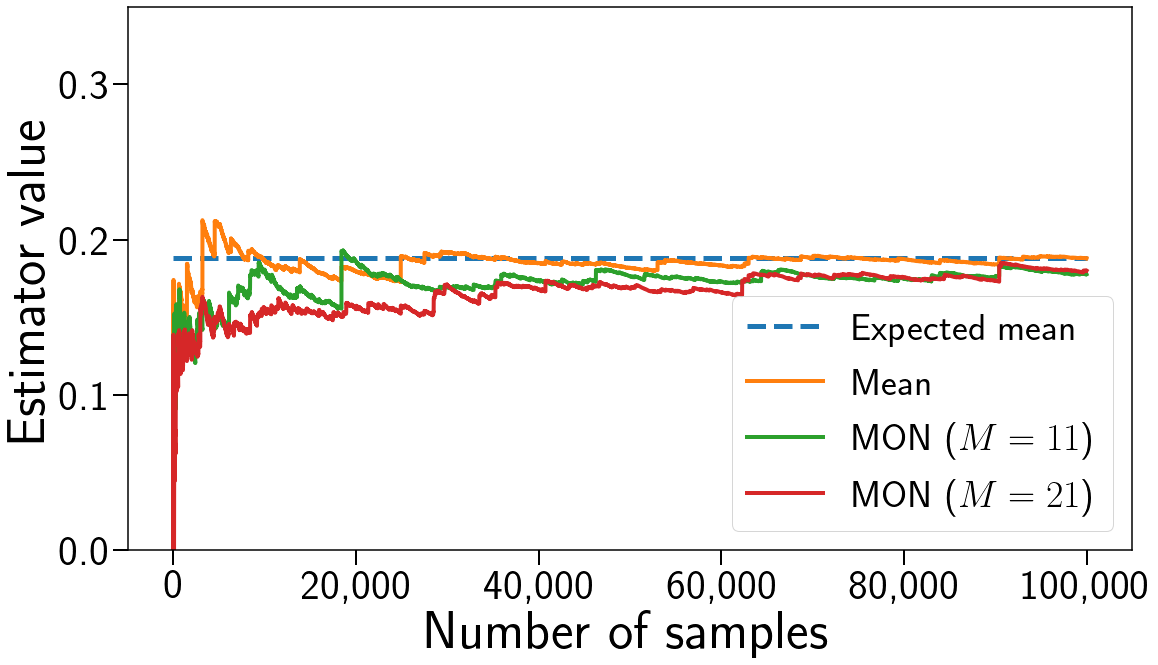

In [426]:
params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 38,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (18, 10)}


plt.rcParams.update(params)

plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

labels = ['R', 'G', 'B']


plt.plot([0, 100000], [r_true_mean, r_true_mean], lw=5, label='Expected mean', linestyle="--")
plt.plot(means, label='Mean', linewidth=4)
plt.plot(MON_k11, label='MON ($M=11$)', linewidth=4)
plt.plot(MON_k21, label='MON ($M=21$)', linewidth=4)
#plt.xlim(-1, 100)
        
plt.xlabel("Number of samples")
plt.ylabel(r"Estimator value")
#plt.ylim(0, 0.15)
#plt.xlim(-0.03, 6)
#plt.ylim(0.15, 0.20)
plt.legend()
plt.ylim(0, 0.35)
#plt.xticks(np.arange(-10, 15, step=5), np.arange(-10, 15, step=5))  # Set label locations.
plt.xticks(np.arange(0, 120000, step=20000), display_high_number(np.arange(0, 120000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0, 0.40, step=0.1), prepare_mode_data(np.arange(0, 0.45, step=0.1)))
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.savefig("images/estimators_no_outlier.png", transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

In [427]:
samples_axis_mean = np.mean(data_rgb[:, 0])

In [428]:
means_evolution_k11 = create_k_means(data_rgb[:, 0], k=11)
means_evolution_k21 = create_k_means(data_rgb[:, 0], k=21)

In [429]:
means = [ np.mean(m) for m in means_evolution_k11 ]

In [430]:
MON_k11 = [ np.median(m) for m in means_evolution_k11 ]
MON_k21 = [ np.median(m) for m in means_evolution_k21 ]

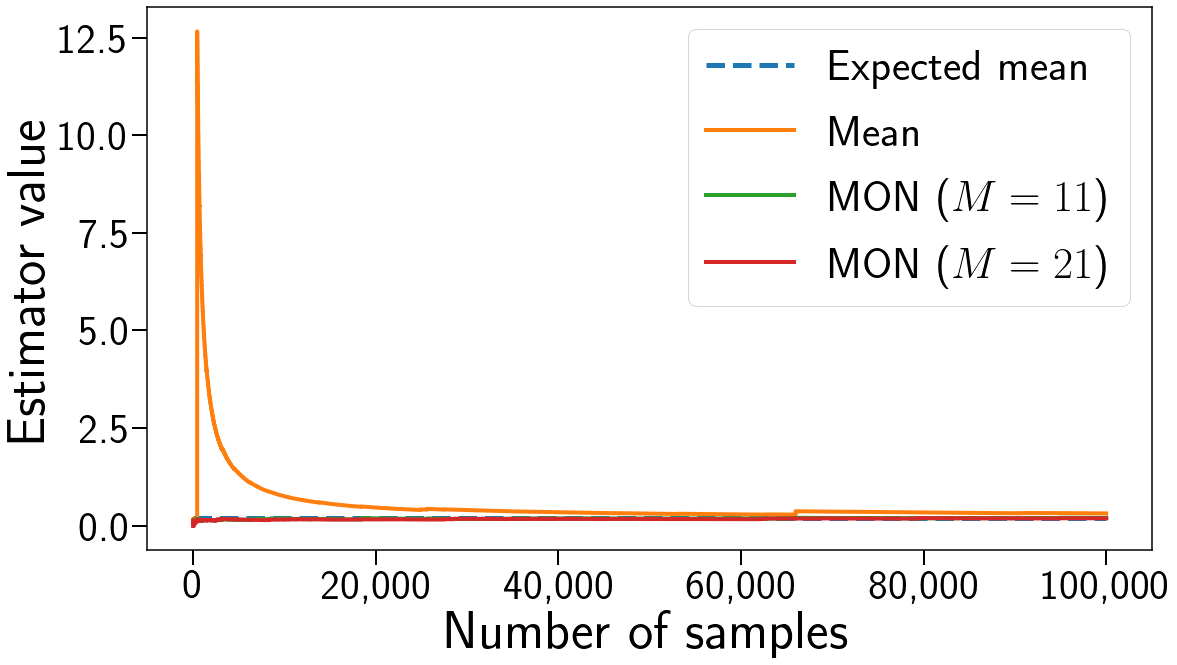

In [431]:
params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (18, 10)}


plt.rcParams.update(params)

plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

labels = ['R', 'G', 'B']

plt.plot([0, 100000], [r_true_mean, r_true_mean], lw=5, label='Expected mean', linestyle="--")
plt.plot(means, label='Mean', linewidth=4)
plt.plot(MON_k11, label='MON ($M=11$)', linewidth=4)
plt.plot(MON_k21, label='MON ($M=21$)', linewidth=4)
#plt.xlim(-1, 100)
        
plt.xlabel("Number of samples")
plt.ylabel(r"Estimator value")
#plt.ylim(0, 0.15)
#plt.xlim(-0.03, 6)
#plt.ylim(0.15, 0.20)
plt.legend()
#plt.xticks(np.arange(-10, 15, step=5), np.arange(-10, 15, step=5))  # Set label locations.
plt.xticks(np.arange(0, 120000, step=20000), display_high_number(np.arange(0, 120000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0, 15, step=2.5), prepare_mode_data(np.arange(0, 15, step=2.5)))
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.savefig("images/estimators_outliers.png", transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

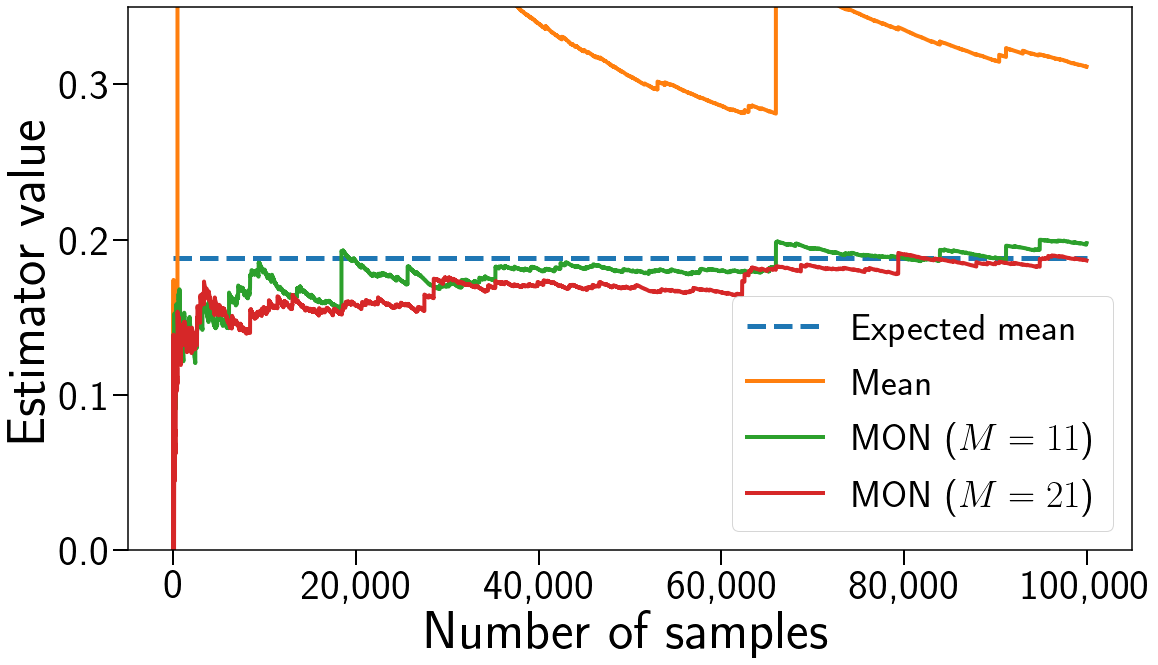

In [432]:
params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 38,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (18, 10)}


plt.rcParams.update(params)

plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

labels = ['R', 'G', 'B']

plt.plot([0, 100000], [r_true_mean, r_true_mean], lw=5, label='Expected mean', linestyle="--")
plt.plot(means, label='Mean', linewidth=4)
plt.plot(MON_k11, label='MON ($M=11$)', linewidth=4)
plt.plot(MON_k21, label='MON ($M=21$)', linewidth=4)
#plt.xlim(-1, 100)
        
plt.xlabel("Number of samples")
plt.ylabel(r"Estimator value")
#plt.ylim(0, 0.15)
#plt.xlim(-0.03, 6)
plt.ylim(0, 0.35)
plt.legend()
#plt.xticks(np.arange(-10, 15, step=5), np.arange(-10, 15, step=5))  # Set label locations.
plt.xticks(np.arange(0, 120000, step=20000), display_high_number(np.arange(0, 120000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0, 0.40, step=0.1), prepare_mode_data(np.arange(0, 0.45, step=0.1)))
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.savefig("images/estimators_outliers_scale.png", transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

# Alpha-MON study

In [433]:
def alpha_mon(means, nexpected=11, alpha=0.5):
    
    n = len(means)
    mIndex = int(len(means) / 2)
    
    meansSorted = sorted(means)
    
    meanSum = meansSorted[mIndex]
    weightSum = 1
    
    if n < nexpected:
        return np.median(meansSorted)
    
    for i in range(1, mIndex + 1):
        confidence = pow(alpha, i)
        
        meanSum += meansSorted[mIndex - i] * confidence
        meanSum += meansSorted[mIndex + i] * confidence
        weightSum += 2 * confidence
        
    return meanSum / weightSum

### Noisy study

In [434]:
means_evolution_k11 = create_k_means(data_rgb[:, 0], k=11)
means_evolution_k21 = create_k_means(data_rgb[:, 0], k=21)

In [435]:
means = [ np.mean(m) for m in means_evolution_k11 ]

In [436]:
MON_k11 = [ np.median(m) for m in means_evolution_k11 ]
MON_k21 = [ np.median(m) for m in means_evolution_k21 ]

In [437]:
AMON_k11 = [ alpha_mon(m, 11, 0.7) for m in means_evolution_k11 ]
AMON_k21 = [ alpha_mon(m, 21, 0.7) for m in means_evolution_k21 ]

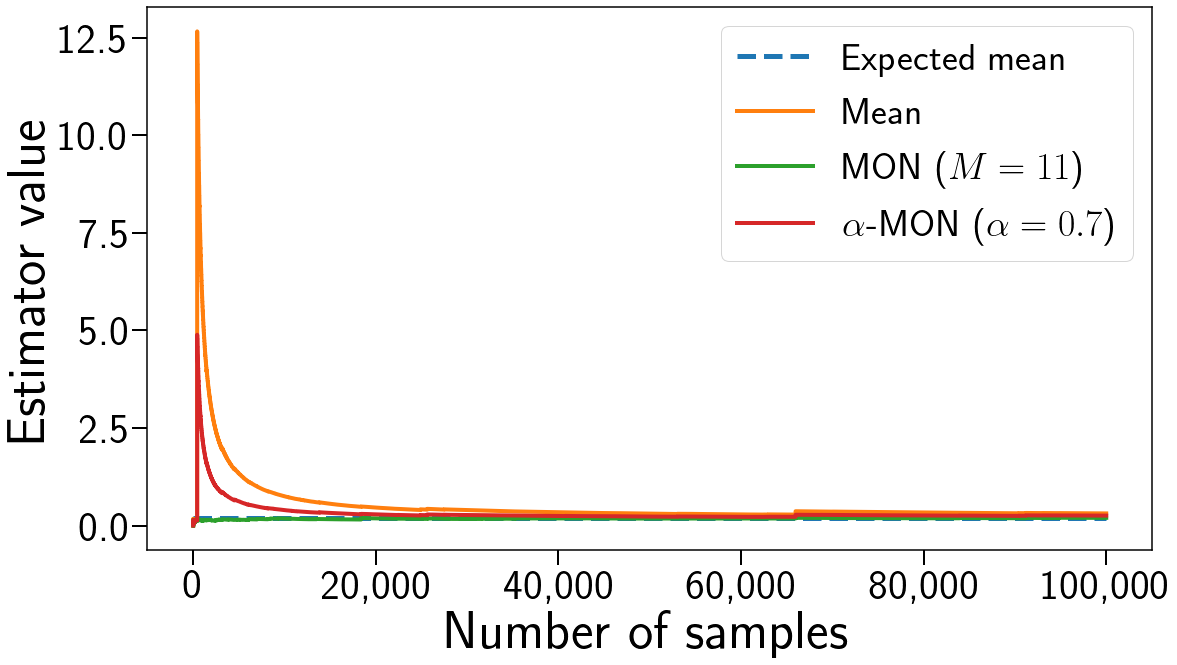

In [438]:
params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 38,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (18, 10)}


plt.rcParams.update(params)

plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

labels = ['R', 'G', 'B']

plt.plot([0, 100000], [r_true_mean, r_true_mean], lw=5, label='Expected mean', linestyle="--")
plt.plot(means, label='Mean', linewidth=4)
plt.plot(MON_k11, label='MON ($M=11$)', linewidth=4)
plt.plot(AMON_k11, label=r'$\alpha$-MON ($\alpha = 0.7$)', linewidth=4)
#plt.xlim(-1, 100)
        
plt.xlabel("Number of samples")
plt.ylabel(r"Estimator value")
#plt.ylim(0, 0.15)
#plt.xlim(-0.03, 6)
#plt.ylim(0.15, 0.20)
plt.legend()
#plt.xticks(np.arange(-10, 15, step=5), np.arange(-10, 15, step=5))  # Set label locations.
plt.xticks(np.arange(0, 120000, step=20000), display_high_number(np.arange(0, 120000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0, 15, step=2.5), prepare_mode_data(np.arange(0, 15, step=2.5)))
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.savefig("images/amon_estimators_outliers.png", transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

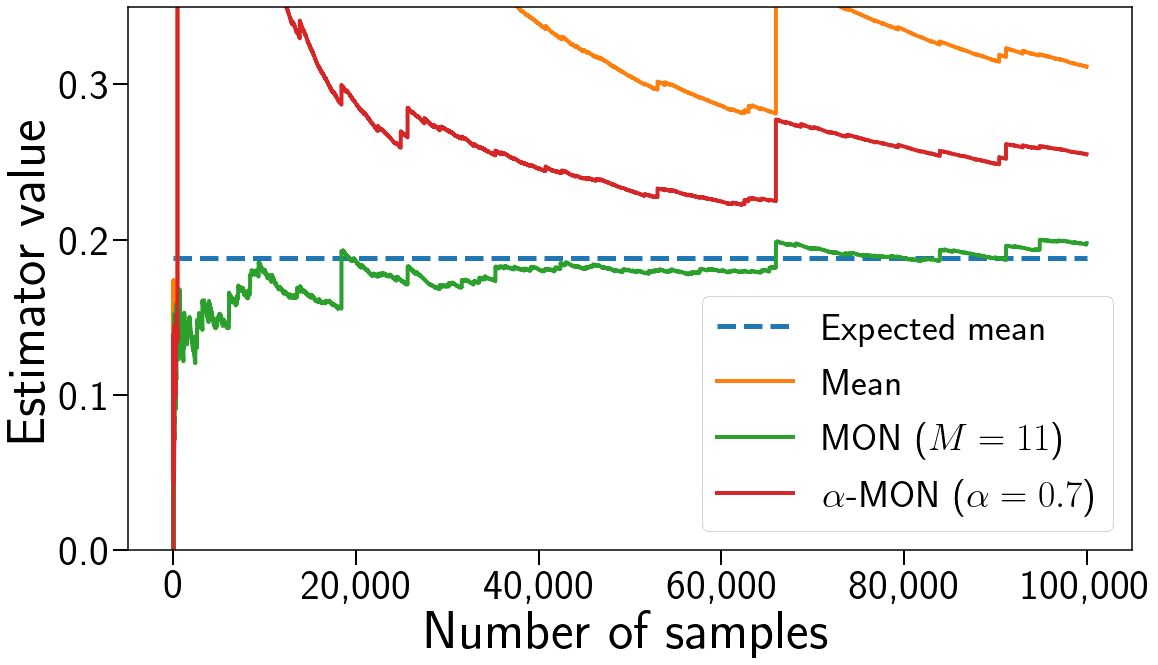

In [439]:
params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 38,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (18, 10)}


plt.rcParams.update(params)

plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

labels = ['R', 'G', 'B']

plt.plot([0, 100000], [r_true_mean, r_true_mean], lw=5, label='Expected mean', linestyle="--")
plt.plot(means, label='Mean', linewidth=4)
plt.plot(MON_k11, label='MON ($M=11$)', linewidth=4)
plt.plot(AMON_k11, label=r'$\alpha$-MON ($\alpha = 0.7$)', linewidth=4)
#plt.xlim(-1, 100)
        
plt.xlabel("Number of samples")
plt.ylabel(r"Estimator value")
#plt.ylim(0, 0.15)
#plt.xlim(-0.03, 6)
plt.ylim(0, 0.35)
plt.legend()
#plt.xticks(np.arange(-10, 15, step=5), np.arange(-10, 15, step=5))  # Set label locations.
plt.xticks(np.arange(0, 120000, step=20000), display_high_number(np.arange(0, 120000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0, 0.40, step=0.1), prepare_mode_data(np.arange(0, 0.45, step=0.1)))
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.savefig("images/amon_estimators_outliers_scale.png", transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

In [440]:
means_evolution_filtered_k11 = create_k_means(data_filtered_rgb[0], k=11)
means_evolution_filtered_k21 = create_k_means(data_filtered_rgb[0], k=21)

In [441]:
means = [ np.mean(m) for m in means_evolution_filtered_k11 ]

In [442]:
MON_k11 = [ np.median(m) for m in means_evolution_filtered_k11 ]
MON_k21 = [ np.median(m) for m in means_evolution_filtered_k21 ]

In [443]:
AMON_k11 = [ alpha_mon(m, 11, 0.7) for m in means_evolution_filtered_k11 ]
AMON_k21 = [ alpha_mon(m, 21, 0.7) for m in means_evolution_filtered_k21 ]

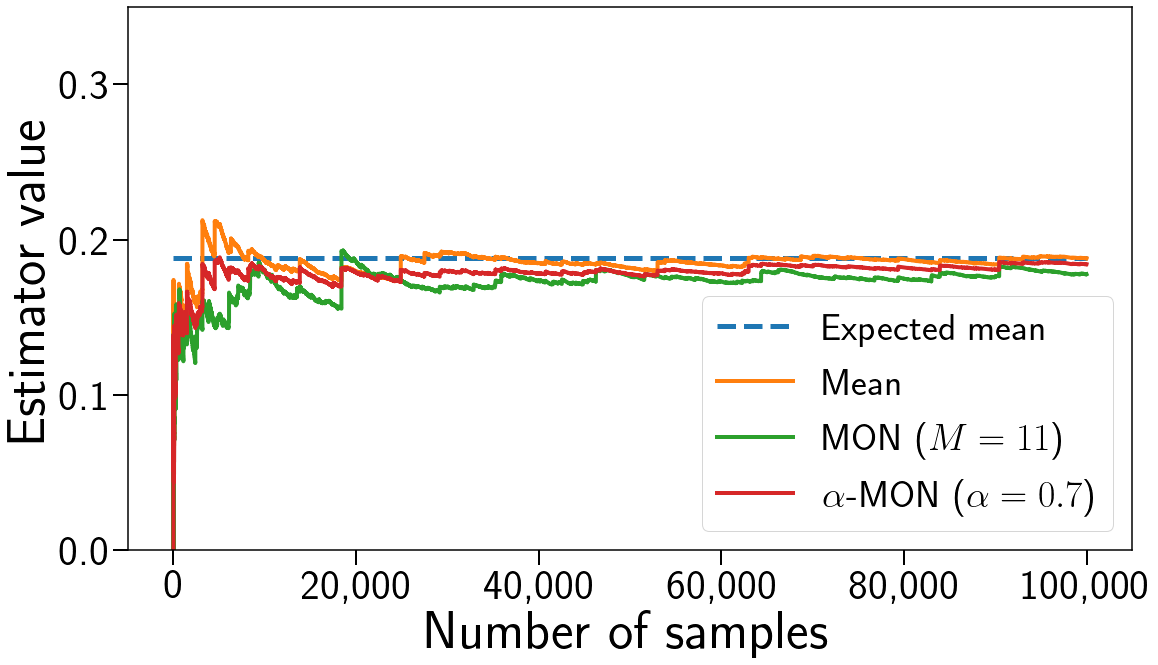

In [444]:
params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 38,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (18, 10)}


plt.rcParams.update(params)

plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

labels = ['R', 'G', 'B']

plt.plot([0, 100000], [r_true_mean, r_true_mean], lw=5, label='Expected mean', linestyle="--")
plt.plot(means, label='Mean', linewidth=4)
plt.plot(MON_k11, label='MON ($M=11$)', linewidth=4)
plt.plot(AMON_k11, label=r'$\alpha$-MON ($\alpha = 0.7$)', linewidth=4)
#plt.xlim(-1, 100)
        
plt.xlabel("Number of samples")
plt.ylabel(r"Estimator value")
#plt.ylim(0, 0.15)
#plt.xlim(-0.03, 6)
#plt.ylim(0.15, 0.20)
plt.legend()
plt.ylim(0, 0.35)
#plt.xticks(np.arange(-10, 15, step=5), np.arange(-10, 15, step=5))  # Set label locations.
plt.xticks(np.arange(0, 120000, step=20000), display_high_number(np.arange(0, 120000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0, 0.40, step=0.1), prepare_mode_data(np.arange(0, 0.45, step=0.1)))
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.savefig("images/amon_estimators_no_outlier.png", transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

# Convergence study

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('rmse_comparisons_ssim.csv', sep=";", header=None)

In [6]:
def display_high_number_50(numbers):
    n = 3
    output = []
    for number in numbers:
        output.append(','.join([str(number)[::-1][i:i+n] for i in range(0, len(str(number)), n)])[::-1])
    return output

In [7]:
labels = [r'$G$-MON$_b$', r'$G$-MON', r'$G$-MON$_p$', r'Mean', r'MON']
order = [1, 0, 2, 4, 3]

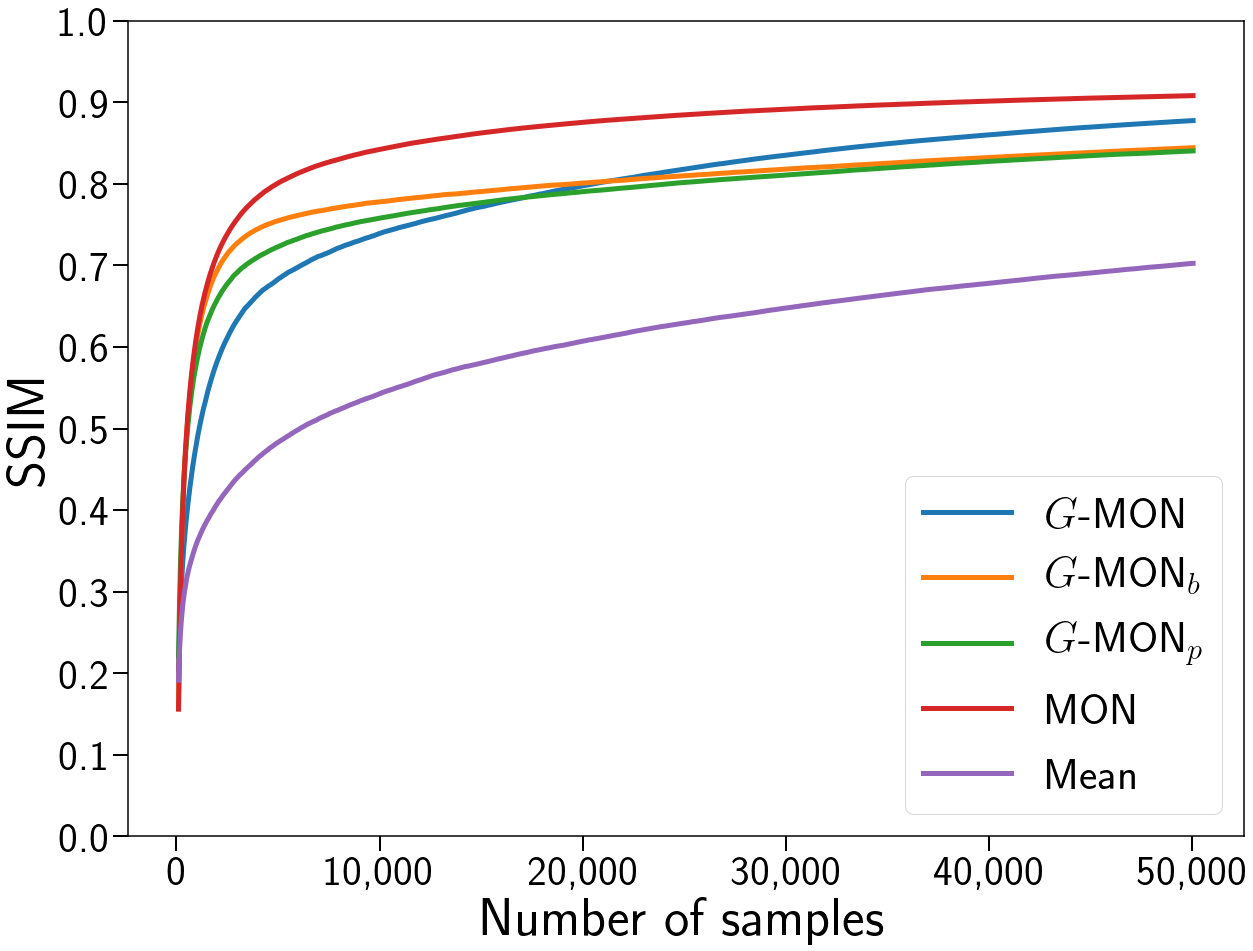

,0,1,2,3,4,5,6,7,8,9,...,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001
0,comparisons-gini_binary_mon,p3d_bidir,0.156508,0.243903,0.306363,0.354573,0.393943,0.425747,0.451740,0.473966,...,0.839311,0.839321,0.839345,0.839342,0.839308,0.839304,0.839286,0.839263,0.839233,0.839254
2,comparisons-gini_mon,p3d_bidir,0.203964,0.252844,0.287011,0.312346,0.333306,0.351373,0.366678,0.380794,...,0.871327,0.871310,0.871304,0.871282,0.871283,0.871261,0.871296,0.871293,0.871290,0.871279
4,comparisons-gini_partial_mon,p3d_bidir,0.220949,0.289318,0.338084,0.376187,0.406696,0.431715,0.452710,0.471084,...,0.823546,0.823532,0.823558,0.823544,0.823550,0.823531,0.823520,0.823504,0.823513,0.823501
6,comparisons-mean,p3d_bidir,0.191615,0.228381,0.251502,0.268196,0.281247,0.292267,0.300964,0.308629,...,0.723374,0.723399,0.723401,0.723379,0.723406,0.723397,0.723399,0.723403,0.723387,0.723391
8,comparisons-mon,p3d_bidir,0.155940,0.242774,0.306078,0.355180,0.395327,0.428020,0.454526,0.477010,...,0.894808,0.894794,0.894795,0.894791,0.894763,0.894764,0.894755,0.894751,0.894720,0.894735


In [10]:
scene_df = df[df.loc[:, 1] == 'p3d_bidir']

params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (20, 15)}

plt.rcParams.update(params)


plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

for i in order:
    row = scene_df.iloc[i]
    plt.plot(row[2:1002], label=labels[i], lw=5)

plt.xticks(np.arange(0, 1200, step=200), display_high_number(np.arange(0, 60000, step=10000)))  # Set label locations.
plt.yticks(np.arange(0, 1.1, step=0.1), prepare_mode_data(np.arange(0, 1.1, step=0.1)))

plt.xlabel('Number of samples')
plt.ylabel('SSIM')

plt.legend()
plt.ylim((0, 1))
plt.savefig('images/gmon_p3d_bidir.png', transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()
scene_df.head()

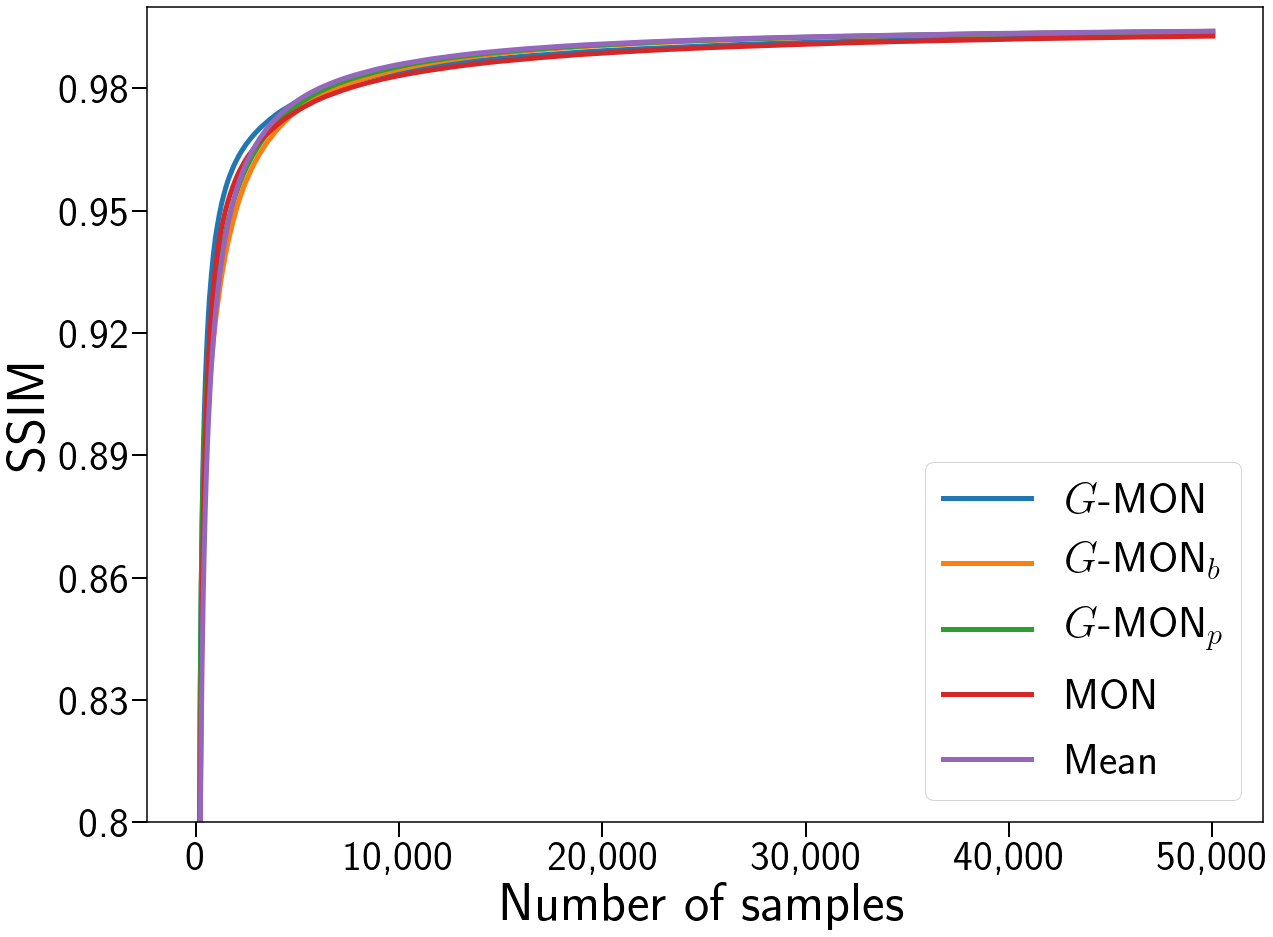

In [15]:
scene_df = df[df.loc[:, 1] == 'p3d_crown']

params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (20, 15)}

plt.rcParams.update(params)

plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

for i in order:
    row = scene_df.iloc[i]
    plt.plot(row[2:1002], label=labels[i], lw=5)

plt.xticks(np.arange(0, 1200, step=200), display_high_number(np.arange(0, 60000, step=10000)))  # Set label locations.
plt.yticks(np.arange(0.8, 1.05, step=0.03), prepare_mode_data(np.arange(0.8, 1.05, step=0.03)))

plt.xlabel('Number of samples')
plt.ylabel('SSIM')

plt.legend()
plt.ylim((0.8, 1))
plt.savefig('images/gmon_p3d_crown.png', transparent=True, bbox_inches = 'tight', pad_inches = 0.1)